In [582]:
# Preparation, importing datasets

import pandas as pd

graduates1_import = pd.read_csv('/Users/SofiaLindegren/Desktop/Introduction to data analytics/archive/all-ages.csv')
print(graduates1.head())

graduates1_import.info()
graduates1_import.shape

graduates1 = graduates1_import.drop(['Major_code', 'Major', 'P25th', 'P75th'], axis=1)

graduates1.duplicated().any() #No duplicates to drop
graduates1.isna().sum() #No missing values

   index                   Major_category   Total  Employed  \
0      0  Agriculture & Natural Resources  128148     90245   
1      1  Agriculture & Natural Resources   95326     76865   
2      2  Agriculture & Natural Resources   33955     26321   
3      3  Agriculture & Natural Resources  103549     81177   
4      4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423           0.026147   50000   
1                          64240        2266           0.028636   54000   
2                          22810         821           0.030248   63000   
3                          64937        3619           0.042679   46000   
4                          12722         894           0.049188   62000   

   Employment_rate Unemployment_def  
0         0.704225              Low  
1         0.806338              Low  
2         0.775173              Low  
3         0.783948

index                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
dtype: int64

In [583]:
# Summary statistics for Graduates1

#Adding column with function
def Employment_rate(graduates1):
    func = graduates1['Employed'] / graduates1['Total']
    return func

graduates1['Employment_rate'] = graduates1.apply(Employment_rate, axis=1)

print(graduates1.head())

   index                   Major_category   Total  Employed  \
0      0  Agriculture & Natural Resources  128148     90245   
1      1  Agriculture & Natural Resources   95326     76865   
2      2  Agriculture & Natural Resources   33955     26321   
3      3  Agriculture & Natural Resources  103549     81177   
4      4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423           0.026147   50000   
1                          64240        2266           0.028636   54000   
2                          22810         821           0.030248   63000   
3                          64937        3619           0.042679   46000   
4                          12722         894           0.049188   62000   

   Employment_rate  
0         0.704225  
1         0.806338  
2         0.775173  
3         0.783948  
4         0.711738  


In [584]:
#Groupby and summary statistics

print('Descriptive statistics')
print(graduates1.describe().round(2))

print('')

print('Total graduates in Major Category')
print(graduates1.groupby('Major_category')['Total'].count())

print('')

print('Descriptive statistics - Median salary statistics for Major Category')
graduates12 = graduates1.groupby('Major_category')['Median'].mean().round()
graduates13 = graduates1.groupby('Major_category')['Median'].agg([min, max])

print(graduates12)
print(graduates13)

Descriptive statistics
        index       Total    Employed  Employed_full_time_year_round  \
count  173.00      173.00      173.00                         173.00   
mean    86.00   230256.64   166161.98                      126307.77   
std     50.08   422068.48   307324.40                      242425.39   
min      0.00     2396.00     1492.00                        1093.00   
25%     43.00    24280.00    17281.00                       12722.00   
50%     86.00    75791.00    56564.00                       39613.00   
75%    129.00   205763.00   142879.00                      111025.00   
max    172.00  3123510.00  2354398.00                     1939384.00   

       Unemployed  Unemployment_rate     Median  Employment_rate  
count      173.00             173.00     173.00           173.00  
mean      9725.03               0.06   56816.18             0.72  
std      18022.04               0.02   14706.23             0.08  
min          0.00               0.00   35000.00             

In [585]:
import numpy as np
# Pivottable for better visibility
graduates1.pivot_table(values='Median', index='Major_category', aggfunc=[np.mean, np.min, np.max]).round()

,mean,amin,amax
,Median,Median,Median
Major_category,,,
Agriculture & Natural Resources,55000.0,46000,63000
Arts,43525.0,37600,47000
Biology & Life Science,50821.0,35000,60000
Business,60615.0,49000,72000
Communications & Journalism,49500.0,48000,50000
Computers & Mathematics,66273.0,50000,92000
Education,43831.0,35300,58000
Engineering,77759.0,60000,125000


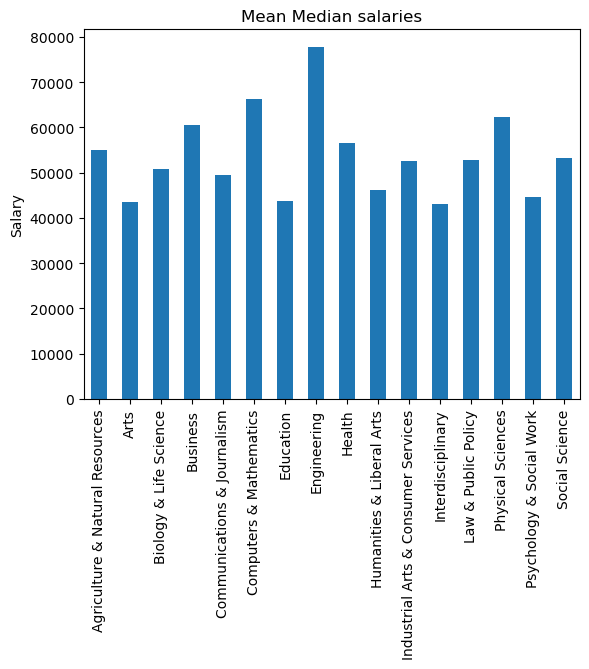

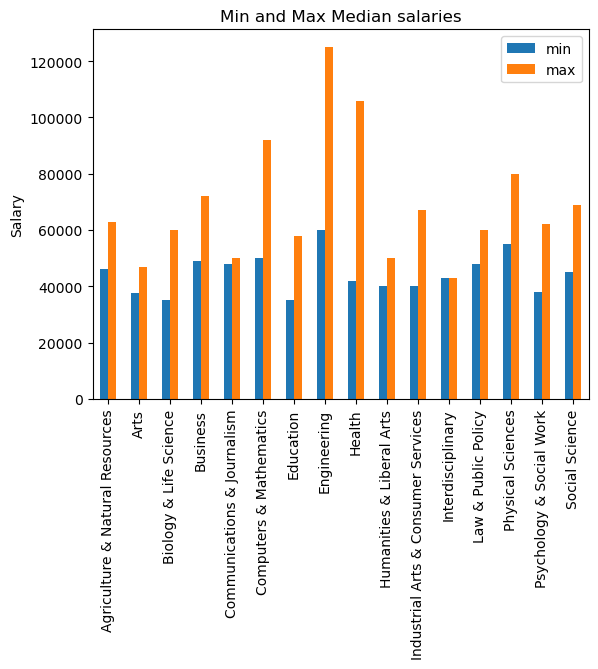

In [586]:
#Graphs of mean, min and max values for each Major Category

import matplotlib.pyplot as plt

graduates12.plot(kind='bar', title='Mean Median salaries', xlabel='', ylabel='Salary')
graduates13.plot(kind='bar', title='Min and Max Median salaries', xlabel='', ylabel='Salary')
plt.show()

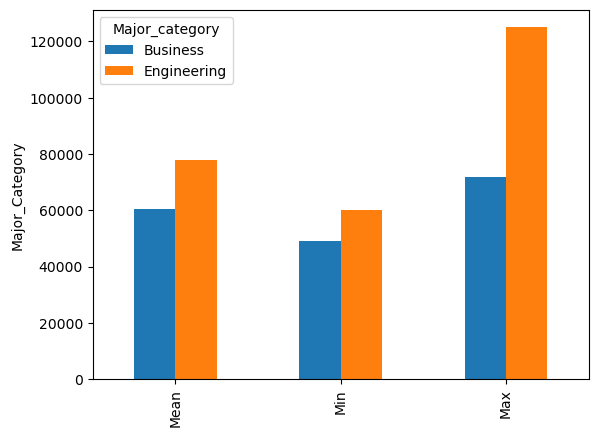

In [587]:
#How much do Business majors make compared to Engineering majors?

BvsE_graduates = graduates1[graduates1['Major_category'].isin(['Business', 'Engineering'])]
BvsE_df = BvsE_graduates.pivot_table(values='Median', index='Major_category', aggfunc=[np.mean, np.min, np.max]).round()

ax = BvsE_df.T.plot(kind='bar', ylabel='Major_Category')
ax.set_xticklabels(['Mean', 'Min', 'Max'])
plt.show()

In [588]:
#What majors are the top 50 earners?

graduates1_sort = graduates1.set_index('Median').sort_index(ascending=False).drop('index', axis=1)
graduates1_slice = graduates1_sort.iloc[0:51,0:1]
print(graduates1_slice['Major_category'].value_counts())

Engineering                            27
Computers & Mathematics                 7
Business                                6
Physical Sciences                       3
Industrial Arts & Consumer Services     3
Health                                  2
Agriculture & Natural Resources         2
Social Science                          1
Name: Major_category, dtype: int64


Major_category                       Unemployment_def
Agriculture & Natural Resources      Low                 10
Arts                                 High                 7
                                     Low                  1
Biology & Life Science               Low                 11
                                     High                 3
Business                             Low                 10
                                     High                 3
Communications & Journalism          High                 4
Computers & Mathematics              Low                  8
                                     High                 3
Education                            Low                 14
                                     High                 2
Engineering                          Low                 24
                                     High                 5
Health                               Low                  9
                                     High     

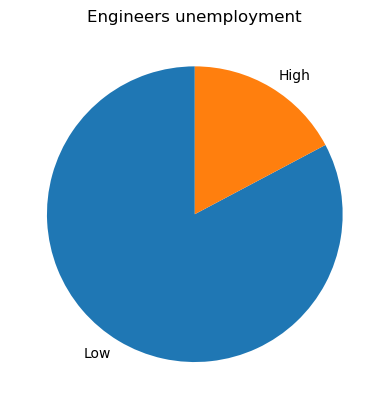

In [590]:
# High unemployment rate (healthy unemployment 4-6 percent) > 6 %

graduates1['Unemployment_def'] = graduates1['Unemployment_rate'].apply(lambda x:'High' if x>0.06 else 'Low')
grads_unempl = graduates1.groupby('Major_category')['Unemployment_def'].value_counts()
print(grads_unempl)

plt.pie(grads_unempl['Engineering'],labels=['Low', 'High'], startangle=90)
plt.title('Engineers unemployment')
plt.show()


In [591]:
# Importing new dataset and merging with graduates1

graduates2_import = pd.read_csv('/Users/SofiaLindegren/Desktop/Introduction to data analytics/archive/recent-grads.csv')

graduates2_import.info()
graduates2_import.shape

graduates2 = graduates2_import[['index', 'Men', 'Women', 'ShareWomen']]

graduates2.duplicated().any() #No duplicates to drop
graduates2.isna().sum() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 173 non-null    int64  
 1   Rank                  173 non-null    int64  
 2   Major_code            173 non-null    int64  
 3   Major                 173 non-null    object 
 4   Major_category        173 non-null    object 
 5   Total                 173 non-null    int64  
 6   Sample_size           173 non-null    int64  
 7   Men                   173 non-null    int64  
 8   Women                 173 non-null    int64  
 9   ShareWomen            173 non-null    float64
 10  Employed              173 non-null    int64  
 11  Full_time             173 non-null    int64  
 12  Part_time             173 non-null    int64  
 13  Full_time_year_round  173 non-null    int64  
 14  Unemployed            173 non-null    int64  
 15  Unemployment_rate     1

index         0
Men           0
Women         0
ShareWomen    0
dtype: int64

In [592]:
#Merging sets

graduates3 = graduates1.merge(graduates2, on='index', how='left')
print(graduates3.head())

graduates3.info()
print(graduates3.shape)

   index                   Major_category   Total  Employed  \
0      0  Agriculture & Natural Resources  128148     90245   
1      1  Agriculture & Natural Resources   95326     76865   
2      2  Agriculture & Natural Resources   33955     26321   
3      3  Agriculture & Natural Resources  103549     81177   
4      4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423           0.026147   50000   
1                          64240        2266           0.028636   54000   
2                          22810         821           0.030248   63000   
3                          64937        3619           0.042679   46000   
4                          12722         894           0.049188   62000   

   Employment_rate Unemployment_def    Men  Women  ShareWomen  
0         0.704225              Low   2057    282    0.120564  
1         0.806338              Low    679

In [593]:
#Using lists to give values to ShareWomen

conditions = [
    (graduates3['ShareWomen'] < 0.40),
    (graduates3['ShareWomen'] > 0.60),
    (graduates3['ShareWomen'] >= 0.40) & (graduates3['ShareWomen'] <= 0.60)
    ]

values = ['Low', 'High', 'Equal']

graduates3['Women_Share_Value'] = np.select(conditions, values)

graduates3.head()

,index,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,Employment_rate,Unemployment_def,Men,Women,ShareWomen,Women_Share_Value
0,0,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,0.704225,Low,2057,282,0.120564,Low
1,1,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,0.806338,Low,679,77,0.101852,Low
2,2,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,0.775173,Low,725,131,0.153037,Low
3,3,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,0.783948,Low,1123,135,0.107313,Low
4,4,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,0.711738,Low,21239,11021,0.341631,Low


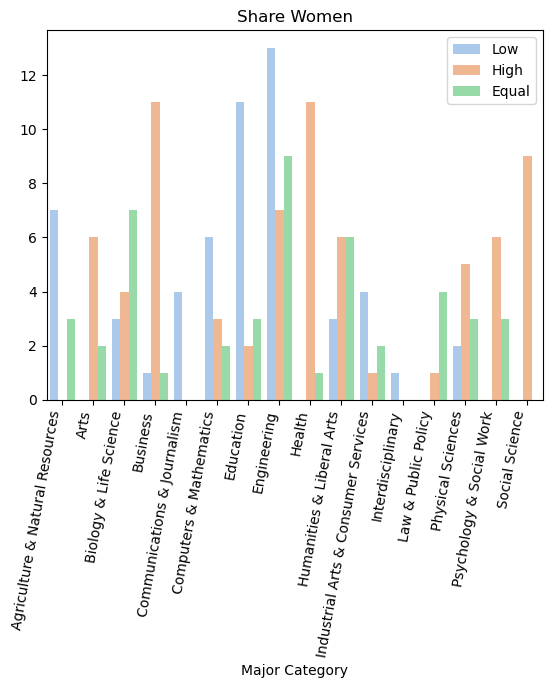

In [594]:
#Counting Low, High and Equal share of women and showing with barplot

count_women = graduates3.groupby(['Major_category','Women_Share_Value']).size().reset_index(name='counts')
df_women = pd.pivot_table(count_women, 
                              index=['Major_category','Women_Share_Value'], 
                              values='counts', 
                              fill_value=0, 
                              dropna=False, 
                              aggfunc=np.sum)

df_women1 = df_women.reset_index()

labels1 = graduates3['Major_category'].values.tolist()
labels2 = sorted([*set(labels1)])

import seaborn as sns

sns.barplot(
    data = df_women1,
    x='Major_category',
    y='counts',
    hue='Women_Share_Value',
    order=labels2,
    hue_order=['Low', 'High', 'Equal'],
    palette='pastel')
plt.title('Share Women')
plt.ylabel('')
plt.xlabel('Major Category')
plt.xticks(rotation=80, ha='right')
plt.legend(loc='upper right')
plt.show()